## Neural Networks image recognition - MultiLayer Perceptron
Use both MLNN for the following problem.

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

# `np.random.normal`

## Parameters

### loc

Mean (“centre”) of the distribution.

### scale

Standard deviation (spread or “width”) of the distribution. Must be non-negative.

### size

Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.

# Neural Networks - Image Recognition 

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

In [3]:
import numpy as np
import matplotlib.pyplot as  plt
%matplotlib inline

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [4]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

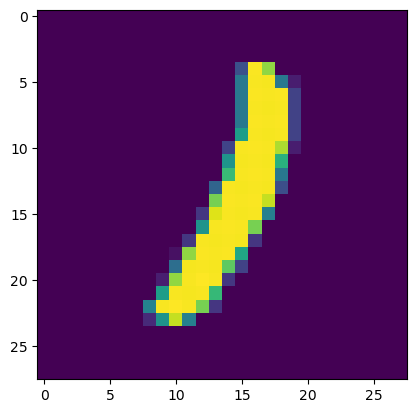

In [5]:
plt.imshow(x_train[78])

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [7]:
# Noise is added here
# The max value of the noise should not grossly surpass 1.0

train_noise = np.random.normal(loc = 0, scale = .2, size = (60000, 784))
train_noise

array([[ 0.08126593, -0.01748779, -0.20381171, ..., -0.15566238,
        -0.0870981 ,  0.12440182],
       [-0.03588134, -0.11944615, -0.0259188 , ...,  0.14859197,
         0.12646918, -0.2767158 ],
       [ 0.1003411 , -0.03608804, -0.52189944, ..., -0.09436418,
        -0.15030536, -0.17801373],
       ...,
       [-0.09082036, -0.35341562, -0.43288236, ..., -0.21343308,
         0.45737721,  0.49896356],
       [ 0.12160961,  0.2119458 ,  0.15881856, ...,  0.19184773,
        -0.13099561, -0.223774  ],
       [ 0.12313619,  0.22572214, -0.1410415 , ...,  0.04241977,
         0.09899116,  0.05288966]])

In [8]:
# using scale of .2 results in a max train_noise value of slightly greater than 1
np.max(train_noise)

1.0742734042970077

In [9]:
noisy_train = x_train + train_noise
noisy_train

array([[ 0.08126593, -0.01748779, -0.20381171, ..., -0.15566238,
        -0.0870981 ,  0.12440182],
       [-0.03588134, -0.11944615, -0.0259188 , ...,  0.14859197,
         0.12646918, -0.2767158 ],
       [ 0.1003411 , -0.03608804, -0.52189944, ..., -0.09436418,
        -0.15030536, -0.17801373],
       ...,
       [-0.09082036, -0.35341562, -0.43288236, ..., -0.21343308,
         0.45737721,  0.49896356],
       [ 0.12160961,  0.2119458 ,  0.15881856, ...,  0.19184773,
        -0.13099561, -0.223774  ],
       [ 0.12313619,  0.22572214, -0.1410415 , ...,  0.04241977,
         0.09899116,  0.05288966]])

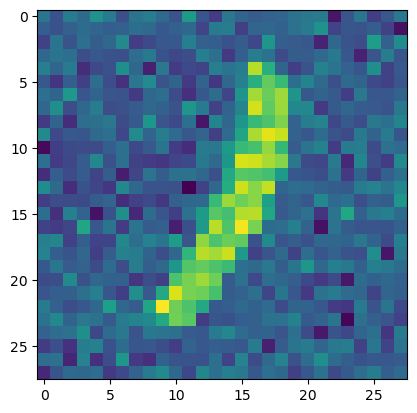

In [10]:
plt.imshow(noisy_train[78].reshape(28,28))

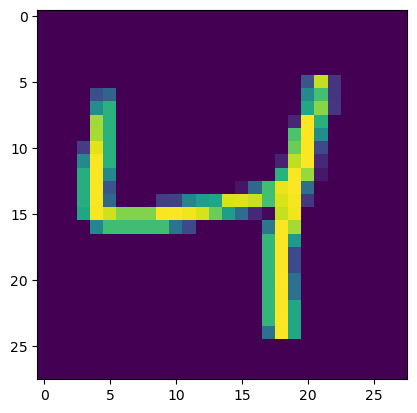

In [11]:
# try another image to compare without and with noise
plt.imshow(x_train[2].reshape(28,28))

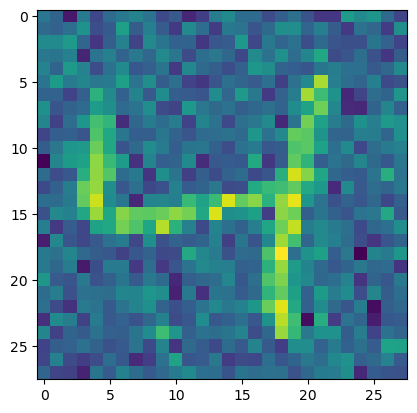

In [12]:
plt.imshow(noisy_train[2].reshape(28,28)) 

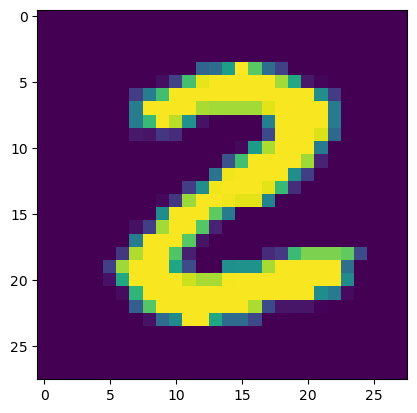

In [13]:
# try one more
plt.imshow(x_train[25].reshape(28,28))

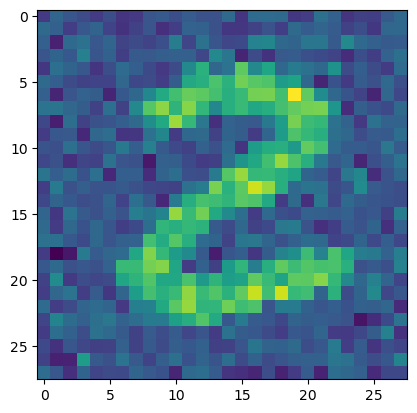

In [14]:
plt.imshow(noisy_train[25].reshape(28,28)) # noise looks different across several images

In [15]:
# create test noise
test_noise = np.random.normal(loc = 0, scale = .2, size = (10000, 784))

test_noise

array([[ 0.02300626,  0.07715011, -0.2989425 , ...,  0.27787047,
         0.00616911,  0.34160362],
       [ 0.26087733,  0.26885765,  0.23135801, ..., -0.27623823,
        -0.01246473,  0.5440109 ],
       [-0.36873861, -0.1800128 ,  0.05658212, ...,  0.15990073,
         0.12670789,  0.36669652],
       ...,
       [ 0.1035583 ,  0.12869202,  0.07773078, ..., -0.37332001,
         0.0784483 ,  0.19068959],
       [-0.37505328, -0.0163447 ,  0.3807691 , ...,  0.11680184,
         0.21901315, -0.00744946],
       [-0.18394562, -0.09016035,  0.10775793, ...,  0.09249852,
         0.14714264, -0.06206457]])

In [16]:
np.max(test_noise) # close to 1

1.0642066740379001

In [17]:
noisy_test = x_test + test_noise

In [18]:
# without noise
batch_size = 128
num_classes = 10
epochs = 20


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [

In [19]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# with noise
batch_size = 128
num_classes = 10
epochs = 20


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(noisy_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(noisy_test, y_test))
score = model.evaluate(noisy_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469

Adding noise results in higher test loss and lower test accuracy.

In [ ]:
# Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. 
# Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` 
# and keep track of the `accuracy` for training and validation and plot these results.

In [27]:
scale_vals = [.1, .5, 1.0, 2.0, 4.0]
scores = []


model = Sequential()
scale_val = .1

for scale_val in scale_vals:
    
    # train noise
    train_noise = np.random.normal(loc = 0, scale = scale_val, size = (60000, 784))
    # test noise
    test_noise = np.random.normal(loc = 0, scale = scale_val, size = (10000, 784))
    
    # the data, shuffled and split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    x_train = x_train.reshape(60000, 784)
    x_test = x_test.reshape(10000, 784)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    
    noisy_train = x_train + train_noise
    noisy_test = x_test + test_noise
    
    # with noise
    batch_size = 128
    num_classes = 10
    epochs = 20


    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer="adam",
                  metrics=['accuracy'])

    history = model.fit(noisy_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(noisy_test, y_test))
    score = model.evaluate(noisy_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    scores.append(score)
    
    scale_val += .1


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469

 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 1.0777 - accuracy: 0.6320 - val_loss: 0.7941 - val_accuracy: 0.7338
Epoch 2/20
469/469 [=========

                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 512)               262656    
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 2.4173 - accuracy: 0.1408 - val_loss: 2.1886 - val_accuracy: 0.2015
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 2.1244 - accuracy: 0.

In [28]:
scores

[[0.11990390717983246, 0.9779000282287598],
 [0.4790455102920532, 0.9190000295639038],
 [1.5387468338012695, 0.7540000081062317],
 [2.8354389667510986, 0.4185999929904938],
 [2.8680500984191895, 0.19900000095367432]]

In [34]:
accuracies = [i[1] for i in scores]
accuracies

[0.9779000282287598,
 0.9190000295639038,
 0.7540000081062317,
 0.4185999929904938,
 0.19900000095367432]

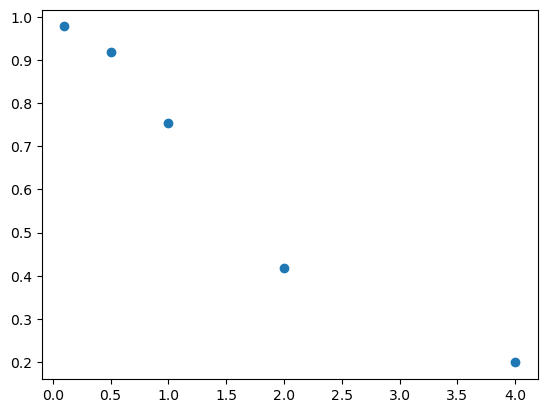

In [35]:
# plot scores
plt.scatter(scale_vals, accuracies)

Accuracy decreases as scale values increase.